In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tqdm

data_path = "./data/"

In [5]:
table = cv.imread(data_path + "whiteballssample.jpg")

### Original image

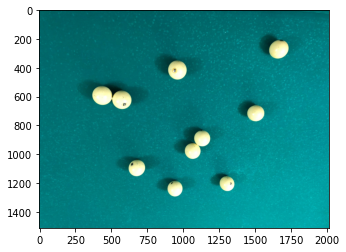

In [6]:
plt.imshow(cv.cvtColor(table, cv.COLOR_BGR2RGB))

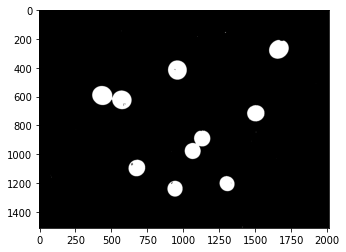

In [63]:
_, binary_table = cv.threshold(table[:, :, 2],50,255,cv.THRESH_BINARY)
plt.imshow(binary_table, cmap="gray")

In [64]:
def make_morph(image, times: int):
    kernel = np.ones((5, 5), np.uint8)
    if times > 0:
        for _ in range(times):
            image = cv.dilate(image, kernel)
    elif times < 0:
        for _ in range(-times):
            image = cv.erode(image, kernel)
    return image

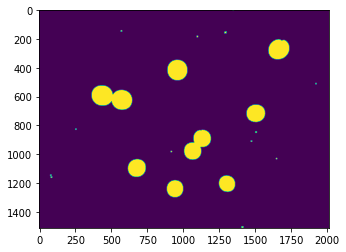

In [74]:
dilated_table = make_morph(binary_table, 2)
plt.imshow(dilated_table)

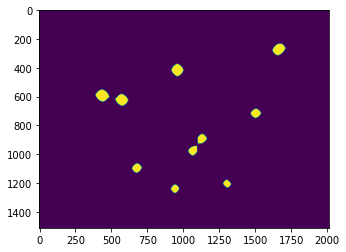

In [76]:
eroded_table = make_morph(dilated_table, -12)
plt.imshow(eroded_table)

Found 10 figures
Found an ellipse with center: [946, 1239] and axes 58, 61 (mean: 59.5)
Found an ellipse with center: [1307, 1204] and axes 55, 55 (mean: 55.0)
Found an ellipse with center: [680, 1096] and axes 69, 68 (mean: 68.5)
Found an ellipse with center: [1068, 976] and axes 63, 67 (mean: 65.0)
Found an ellipse with center: [1134, 892] and axes 65, 68 (mean: 66.5)
Found an ellipse with center: [1507, 716] and axes 73, 66 (mean: 69.5)
Found an ellipse with center: [575, 623] and axes 90, 83 (mean: 86.5)
Found an ellipse with center: [441, 593] and axes 96, 86 (mean: 91.0)
Found an ellipse with center: [962, 416] and axes 84, 87 (mean: 85.5)
Found an ellipse with center: [1668, 274] and axes 90, 81 (mean: 85.5)


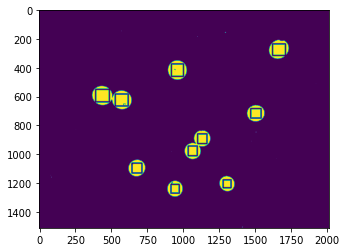

In [128]:
contours, _ = cv.findContours(eroded_table, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(f"Found {len(contours)} figures")
radiuses = []
centers = []
for i, c in enumerate(contours):
    x, y, w, h = cv.boundingRect(c)
    cv.rectangle(binary_table, (x, y), (x+w, y+h), (0, 255, 0), 8)
    cx = x + w // 2
    cy = y + h // 2
    mean_ax = (w + h) / 2
    centers.append([cx, cy])
    radiuses.append(mean_ax / 2)
    print(f"Found an ellipse with center: [{cx}, {cy}] and axes {w}, {h} (mean: {mean_ax})")
centers = np.array(centers)
radiuses = np.array(radiuses)
plt.imshow(binary_table)

### Since we used **dilation 2 times** and then **erosion 12 times**, let's assume that we reduced the sizes of our spheres by **~10 pixels** from each side.
### Then we have:

In [129]:
real_radiuses = radiuses + 10
real_radiuses

array([39.75, 37.5 , 44.25, 42.5 , 43.25, 44.75, 53.25, 55.5 , 52.75,
       52.75])

In [130]:
print(f"Mean radius:\t\t\t{real_radiuses.mean()}")
print(f"Radius variance:\t\t{real_radiuses.var()}")
print(f"Radius standard deviation:\t{real_radiuses.std()}")

Mean radius:			46.625
Radius variance:		36.578125
Radius standard deviation:	6.047985201701472


In [131]:
centers

array([[ 946, 1239],
       [1307, 1204],
       [ 680, 1096],
       [1068,  976],
       [1134,  892],
       [1507,  716],
       [ 575,  623],
       [ 441,  593],
       [ 962,  416],
       [1668,  274]])

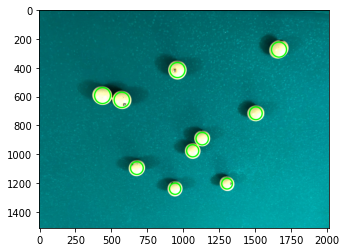

In [132]:
table_w_circles = table.copy()
for i, point in enumerate(centers):
    cv.circle(table_w_circles, (point[0], point[1]), int(real_radiuses[i]), (0, 255, 0), 8)
plt.imshow(cv.cvtColor(table_w_circles, cv.COLOR_BGR2RGB))